# Decision Tree Classification

## Dataset Diabetes Pima Indian untuk Perhitungan Information Gain

### Dataset (15 data, 2 fitur)

| No | Glucose Level | BMI   | Diabetes |
|----|---------------|-------|----------|
| 1  | 148           | 33.6  | Yes      |
| 2  | 85            | 26.6  | No       |
| 3  | 183           | 23.3  | Yes      |
| 4  | 89            | 28.1  | No       |
| 5  | 137           | 43.1  | Yes      |
| 6  | 116           | 25.6  | No       |
| 7  | 78            | 31.0  | No       |
| 8  | 115           | 35.3  | No       |
| 9  | 197           | 30.5  | Yes      |
| 10 | 125           | 32.0  | No       |
| 11 | 110           | 32.4  | No       |
| 12 | 168           | 38.0  | Yes      |
| 13 | 139           | 30.0  | No       |
| 14 | 189           | 30.1  | Yes      |
| 15 | 166           | 25.8  | Yes      |

dari dataset di atas, lakukan perhitungan manual untuk menghitung information gain untuk klasifikasi decision tree

## Deskripsi Dataset

**Fitur Input (Numerik):**
- **Glucose Level**: Kadar glukosa plasma 2 jam setelah tes toleransi glukosa oral (mg/dL)
- **BMI (Body Mass Index)**: Indeks massa tubuh (berat(kg)/(tinggi(m))²)

**Target Variable:**
- **Diabetes**: Status diabetes (Yes/No)

## Konteks Medis

Dataset ini berasal dari studi kesehatan pada wanita Pima Indian berusia ≥21 tahun. Populasi Pima Indian memiliki tingkat diabetes yang tinggi, sehingga dataset ini penting untuk penelitian medis.


## Perhitungan Info gain dan Gini Index

### **1. Entropy Awal (Sebelum Split)**

Jumlah total data: 15
Jumlah **Yes (positif)**: 7
Jumlah **No (negatif)**: 8

$$
P(Yes) = \frac{7}{15}, \quad P(No) = \frac{8}{15}
$$

$$
Entropy(S) = -\frac{7}{15} \log_2 \left(\frac{7}{15}\right) - \frac{8}{15} \log_2 \left(\frac{8}{15}\right)
$$

$$
= -0.467 \cdot \log_2(0.467) - 0.533 \cdot \log_2(0.533)
= -0.467 \cdot (-1.099) - 0.533 \cdot (-0.906)
\approx 0.513 + 0.483 = \boxed{0.996}
$$

---

### **2. Split berdasarkan Glucose Level**
Untuk fitur numerik seperti Glucose Level dan BMI, kita perlu membuat split point. Salah satu pendekatan umum adalah menggunakan nilai median , treshold median ini tidak selalu yang terbaik, namun treshhold biasa nya di sekitar median .

Sebut saja **threshold = 125** untuk Glucose Level.

* **Glucose ≤ 125**:

  * Data: No 2, 4, 6, 7, 8, 10, 11 → 7 data
  * Diabetes: No, No, No, No, No, No, No → 0 Yes, 7 No

* **Glucose > 125**:

  * Data: No 1, 3, 5, 9, 12, 13, 14, 15 → 8 data
  * Diabetes: Yes, Yes, Yes, Yes, Yes, No, Yes, Yes → 7 Yes, 1 No

---

#### **Entropy setelah split di Glucose ≤ 125 dan > 125**

* **Entropy(≤125)**:
  Semua kelas "No", maka:

  $$
  Entropy = 0
  $$

* **Entropy(>125)**:

  $$
  P(Yes) = \frac{7}{8}, \quad P(No) = \frac{1}{8}
  $$

  $$
  = -\frac{7}{8}\log_2\left(\frac{7}{8}\right) - \frac{1}{8}\log_2\left(\frac{1}{8}\right)
  \approx -0.875 \cdot (-0.192) - 0.125 \cdot (-3)
  \approx 0.168 + 0.375 = \boxed{0.543}
  $$

* **Weighted Entropy**:

  $$
  \frac{7}{15} \cdot 0 + \frac{8}{15} \cdot 0.543 = 0 + 0.289 = \boxed{0.289}
  $$

---

#### **Information Gain (Glucose)**

$$
IG = Entropy(S) - Entropy_{split} = 0.996 - 0.289 = \boxed{0.707}
$$

---

### **3. Split berdasarkan BMI**

Ambil threshold **BMI = 30.0**

* **BMI ≤ 30.0**:

  * No 2, 3, 4, 6, 7, 9, 13, 14, 15 → 9 data
  * Diabetes: No, Yes, No, No, No, Yes, No, Yes, Yes → 4 Yes, 5 No

* **BMI > 30.0**:

  * No 1, 5, 8, 10, 11, 12 → 6 data
  * Diabetes: Yes, Yes, No, No, No, Yes → 3 Yes, 3 No

---

#### **Entropy setelah split di BMI ≤ 30.0 dan > 30.0**

* **BMI ≤ 30.0 (9 data, 4 Yes, 5 No)**:

  $$
  P(Yes) = \frac{4}{9}, P(No) = \frac{5}{9}
  $$

  $$
  Entropy = -\frac{4}{9} \log_2\left(\frac{4}{9}\right) - \frac{5}{9} \log_2\left(\frac{5}{9}\right)
  \approx -0.444 \cdot (-1.17) - 0.556 \cdot (-0.847)
  \approx 0.520 + 0.471 = \boxed{0.991}
  $$

* **BMI > 30.0 (6 data, 3 Yes, 3 No)**:

  $$
  P = 0.5,\quad Entropy = -0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 1
  $$

* **Weighted Entropy**:

  $$
  \frac{9}{15} \cdot 0.991 + \frac{6}{15} \cdot 1 = 0.5946 + 0.4 = \boxed{0.9946}
  $$

---

#### **Information Gain (BMI)**

$$
IG = 0.996 - 0.9946 = \boxed{0.0014}
$$

---

### **4. Gini Index**

#### Gini(S) Awal:

$$
Gini = 1 - \left(\frac{7}{15}\right)^2 - \left(\frac{8}{15}\right)^2 = 1 - 0.218 - 0.284 = \boxed{0.498}
$$

---

#### Split pada **Glucose ≤ 125** dan >125:

* Gini(≤125): semua No → Gini = 0

* Gini(>125): 7 Yes, 1 No

  $$
  Gini = 1 - \left(\frac{7}{8}\right)^2 - \left(\frac{1}{8}\right)^2 = 1 - 0.766 - 0.016 = \boxed{0.219}
  $$

* Weighted Gini:

  $$
  \frac{7}{15} \cdot 0 + \frac{8}{15} \cdot 0.219 = \boxed{0.117}
  $$

---

#### Split pada **BMI ≤ 30** dan >30:

* Gini(≤30): 4 Yes, 5 No

  $$
  Gini = 1 - (4/9)^2 - (5/9)^2 = 1 - 0.198 - 0.309 = \boxed{0.493}
  $$

* Gini(>30): 3 Yes, 3 No → Gini = 0.5

* Weighted Gini:

  $$
  \frac{9}{15} \cdot 0.493 + \frac{6}{15} \cdot 0.5 = 0.296 + 0.2 = \boxed{0.496}
  $$

---

### **Kesimpulan Split Terbaik (Decision Tree Root)**

| Fitur        | Info Gain | Gini Index |
| ------------ | --------- | ---------- |
| Glucose ≤125 | **0.707** | **0.117**  |
| BMI ≤30      | 0.0014    | 0.496      |

Dari perhitungan di atas **Glucose** adalah fitur terbaik untuk split awal (akar decision tree), berdasarkan baik **Information Gain** maupun **Gini Index**.


<iframe scrolling="no" title="Matrix-Graph" src="https://www.geogebra.org/material/iframe/id/vmpudvdz/width/1004/height/544/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/true/rc/false/ld/false/sdz/true/ctl/false" width="1004px" height="544px" style="border:0px;"> </iframe>

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

# Dataset
X = np.array([
    [148, 33.6],
    [85, 26.6],
    [183, 23.3],
    [89, 28.1],
    [137, 43.1],
    [116, 25.6],
    [78, 31.0],
    [115, 35.3],
    [197, 30.5],
    [125, 32.0],
    [110, 32.4],
    [168, 38.0],
    [139, 30.0],
    [189, 30.1],
    [166, 25.8]
])

y_labels = [
    "Yes", "No", "Yes", "No", "Yes",
    "No", "No", "No", "Yes", "No",
    "No", "Yes", "No", "Yes", "Yes"
]

# Konversi label ke angka
le = LabelEncoder()
y = le.fit_transform(y_labels)  # Yes = 1, No = 0

# Decision Tree dengan Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf_entropy.fit(X, y)

# Decision Tree dengan Gini
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=1)
clf_gini.fit(X, y)

# Cetak struktur pohon
print("=== Decision Tree (Entropy) ===")
print(export_text(clf_entropy, feature_names=["Glucose", "BMI"]))

print("\n=== Decision Tree (Gini) ===")
print(export_text(clf_gini, feature_names=["Glucose", "BMI"]))

# Fungsi untuk menghitung gain / reduction
def compute_impurity_gain(clf, criterion_name="entropy"):
    tree = clf.tree_

    # Ambil node dan data impurity
    root = 0
    left = tree.children_left[root]
    right = tree.children_right[root]

    n_total = tree.n_node_samples[root]
    n_left = tree.n_node_samples[left]
    n_right = tree.n_node_samples[right]

    impurity_parent = tree.impurity[root]
    impurity_left = tree.impurity[left]
    impurity_right = tree.impurity[right]

    weighted_impurity = (n_left / n_total) * impurity_left + (n_right / n_total) * impurity_right
    gain = impurity_parent - weighted_impurity

    print(f"\n=== {criterion_name.upper()} ===")
    print(f"Impurity (parent)       : {impurity_parent:.4f}")
    print(f"Impurity (left child)   : {impurity_left:.4f} (samples: {n_left})")
    print(f"Impurity (right child)  : {impurity_right:.4f} (samples: {n_right})")
    print(f"Weighted impurity       : {weighted_impurity:.4f}")
    if criterion_name == "entropy":
        print(f">>> Information Gain    : {gain:.4f}")
    else:
        print(f">>> Gini Reduction       : {gain:.4f}")

# Tampilkan hasil
compute_impurity_gain(clf_entropy, "entropy")
compute_impurity_gain(clf_gini, "gini")


=== Decision Tree (Entropy) ===
|--- Glucose <= 131.00
|   |--- class: 0
|--- Glucose >  131.00
|   |--- class: 1


=== Decision Tree (Gini) ===
|--- Glucose <= 131.00
|   |--- class: 0
|--- Glucose >  131.00
|   |--- class: 1


=== ENTROPY ===
Impurity (parent)       : 0.9968
Impurity (left child)   : 0.0000 (samples: 7)
Impurity (right child)  : 0.5436 (samples: 8)
Weighted impurity       : 0.2899
>>> Information Gain    : 0.7069

=== GINI ===
Impurity (parent)       : 0.4978
Impurity (left child)   : 0.0000 (samples: 7)
Impurity (right child)  : 0.2188 (samples: 8)
Weighted impurity       : 0.1167
>>> Gini Reduction       : 0.3811


dari hasil kode yang di atas mengkonfirmasi bahwa **Glucose** adalah fitur paling berpengaruh terhadap klasifikasi diabetes, namun penentuan ambang batas dengan median masih kurang akurat yang juga menyebabkan perhitungan decision tree juga tidak akurat


=== Pohon Keputusan (Textual) ===
|--- Glucose <= 131.00
|   |--- class: 0
|--- Glucose >  131.00
|   |--- Glucose <= 143.50
|   |   |--- BMI <= 36.55
|   |   |   |--- class: 0
|   |   |--- BMI >  36.55
|   |   |   |--- class: 1
|   |--- Glucose >  143.50
|   |   |--- class: 1



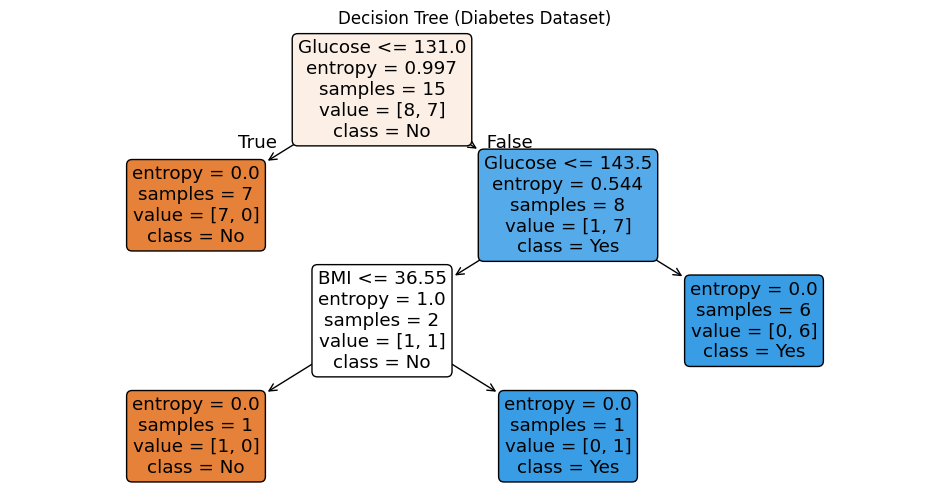


=== Classification Report ===
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         8
         Yes       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Akurasi model: 1.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# 1. Dataset
data = {
    "Glucose": [148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139, 189, 166],
    "BMI":     [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 32.0, 32.4, 38.0, 30.0, 30.1, 25.8],
    "Diabetes": ["Yes", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "Yes"]
}

df = pd.DataFrame(data)

# 2. Encode label
le = LabelEncoder()
df['Diabetes'] = le.fit_transform(df['Diabetes'])  # Yes=1, No=0

# 3. Fitur dan target
X = df[["Glucose", "BMI"]].values
y = df["Diabetes"].values

# 4. Buat dan latih Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None, random_state=42)
clf.fit(X, y)

# 5. Cetak pohon dalam bentuk teks
print("\n=== Pohon Keputusan (Textual) ===")
print(export_text(clf, feature_names=["Glucose", "BMI"]))

# 6. Visualisasi pohon
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=["Glucose", "BMI"], class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree (Diabetes Dataset)")
plt.show()

# 7. Prediksi dan evaluasi sederhana
y_pred = clf.predict(X)
print("\n=== Classification Report ===")
print(classification_report(y, y_pred, target_names=["No", "Yes"]))

print("Akurasi model:", accuracy_score(y, y_pred))


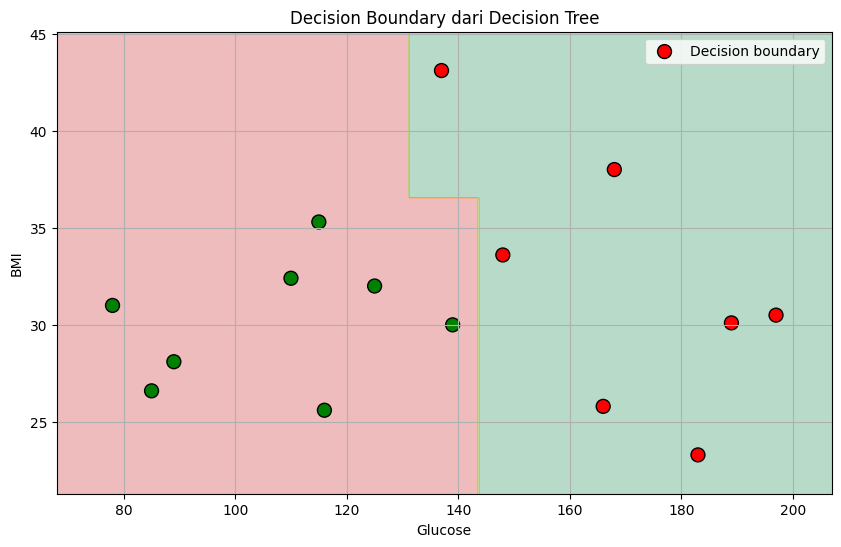

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Buat meshgrid untuk seluruh area data
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10  # Glucose
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2    # BMI
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# 2. Prediksi seluruh titik dalam grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 3. Buat scatter plot
plt.figure(figsize=(10, 6))

# Decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)

# Titik data
colors = ['green' if label == 0 else 'red' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='black', s=100, marker='o', label='Data')

# Label dan axis
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Decision Boundary dari Decision Tree")
plt.legend(['Decision boundary', 'Data'])
plt.grid(True)
plt.show()


Setelah kita melakukan visualisasi decision boundary, kita akan menguji model terhadap dua data baru yang akan kita plot dalam scatterplot

Prediksi data baru: [0 0]


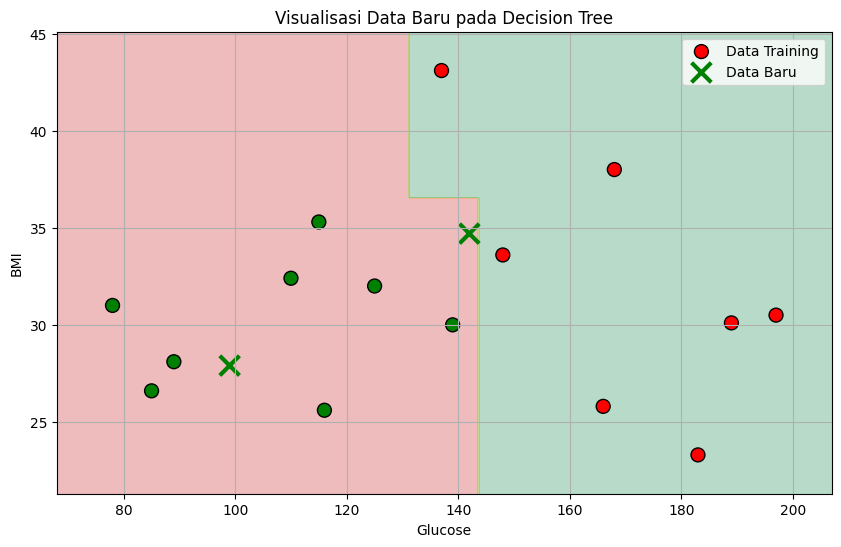

In [6]:
# masukin 2 Data baru
X_new = np.array([
    [99, 27.9],
    [142, 34.7]
])
y_new = np.array([0, 1])  # Label asli: No=0, Yes=1

# 2. Prediksi model
y_pred_new = clf.predict(X_new)
print("Prediksi data baru:", y_pred_new)  # Akan mengeluarkan 0 atau 1 (boolean kalau 0 tidak 1 ya)

# 3. buat figur plot
plt.figure(figsize=(10, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)

# Plot data asli
colors = ['green' if label == 0 else 'red' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='black', s=100, label='Data Training')

# Plot data baru (dengan tanda 'X')
marker_colors = ['green' if p == 0 else 'red' for p in y_pred_new]
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', c=marker_colors, s=200, linewidths=3, label='Data Baru')

# Tambahkan label dan garis
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Visualisasi Data Baru pada Decision Tree")
plt.legend()
plt.grid(True)
plt.show()
